In [1]:
!pip install --upgrade --force-reinstall ipykernel


  Using cached ipykernel-6.30.1-py3-none-any.whl (117 kB)
  Using cached debugpy-1.8.16-cp310-cp310-win_amd64.whl (5.3 MB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl (5.2 kB)
  Using cached jupyter_core-5.8.1-py3-none-any.whl (28 kB)
  Using cached tornado-6.5.2-cp39-abi3-win_amd64.whl (445 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl (85 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl (106 kB)
  Using cached pyzmq-27.0.1-cp310-cp310-win_amd64.whl (631 kB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Using cached psutil-7.0.0-cp37-abi3-win_amd64.whl (244 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl (9.9 kB)
  Using cached ipython-8.37.0-py3-none-any.whl (831 kB)
  Using cached comm-0.2.3-py3-none-any.whl (7.3 kB)
  Using cached pygments-2.19.2-py3-none-any.whl (1.2 MB)
  Using cached exceptiongroup-1.3.0-py3-none-any.whl (16 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached prompt_toolkit-3.0.51-py3-none-an

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\venv\\Lib\\site-packages\\~ornado\\speedups.pyd'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Mengambil Data Node Dari blockchainid Saya mengambil data 1 bulan saja karena memory saya tidak cukup 1 bulan di tahun 2009 bulan januari

In [15]:
import requests
import json
from datetime import datetime

# === Konfigurasi RPC Node ===
RPC_URL = "http://127.0.0.1:8332/"
RPC_USER = "adminrpc"
RPC_PASS = "passwordku123"

def rpc_call(method, params=None):
    payload = {
        "jsonrpc": "1.0",
        "id": "python-client",
        "method": method,
        "params": params or []
    }
    response = requests.post(RPC_URL, auth=(RPC_USER, RPC_PASS), json=payload)
    return response.json()["result"]

# === Range waktu Januari 2009 ===
start_date = datetime(2009, 1, 1)
end_date = datetime(2009, 1, 31, 23, 59, 59)

data_blocks = []  # simpan di list

height = 0
while True:
    block_hash = rpc_call("getblockhash", [height])
    block_info = rpc_call("getblock", [block_hash])
    waktu_block = datetime.utcfromtimestamp(block_info["time"])
    
    if waktu_block > end_date:
        break
    if start_date <= waktu_block <= end_date:
        data_blocks.append({
            "height": height,
            "hash": block_hash,
            "time": waktu_block.strftime('%Y-%m-%d %H:%M:%S'),
            "tx_count": block_info["nTx"]
        })
        print(f"[{waktu_block} UTC] Height: {height} | Hash: {block_hash} | Tx Count: {block_info['nTx']}")
    
    height += 1


[2009-01-03 18:15:05 UTC] Height: 0 | Hash: 000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f | Tx Count: 1
[2009-01-09 02:54:25 UTC] Height: 1 | Hash: 00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048 | Tx Count: 1
[2009-01-09 02:55:44 UTC] Height: 2 | Hash: 000000006a625f06636b8bb6ac7b960a8d03705d1ace08b1a19da3fdcc99ddbd | Tx Count: 1
[2009-01-09 03:02:53 UTC] Height: 3 | Hash: 0000000082b5015589a3fdf2d4baff403e6f0be035a5d9742c1cae6295464449 | Tx Count: 1
[2009-01-09 03:16:28 UTC] Height: 4 | Hash: 000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c228da88e48844a1485 | Tx Count: 1
[2009-01-09 03:23:48 UTC] Height: 5 | Hash: 000000009b7262315dbf071787ad3656097b892abffd1f95a1a022f896f533fc | Tx Count: 1
[2009-01-09 03:29:49 UTC] Height: 6 | Hash: 000000003031a0e73735690c5a1ff2a4be82553b2a12b776fbd3a215dc8f778d | Tx Count: 1
[2009-01-09 03:39:29 UTC] Height: 7 | Hash: 0000000071966c2b1d065fd446b1e485b2c9d9594acd2007ccbd5441cfc89444 | Tx Count: 1
[2009-01-09 03:4

In [16]:
import csv

csv_filename = "blocks_jan_2009.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["height", "hash", "time", "tx_count"])
    writer.writeheader()
    writer.writerows(data_blocks)

print(f"✅ Data Januari 2009 tersimpan ke {csv_filename} (total {len(data_blocks)} block)")


✅ Data Januari 2009 tersimpan ke blocks_jan_2009.csv (total 2544 block)


In [3]:
import os
print(os.getcwd())


c:\venv\analisis_blockchain


In [1]:
import os

print(os.getcwd())          # menampilkan folder aktif kernel
print(os.listdir())         # menampilkan semua file di folder itu


c:\venv\analisis_blockchain
['.venv', 'analisis.ipynb', 'blocks_jan_2009.csv']


In [2]:
import pandas as pd

df = pd.read_csv("blocks_jan_2009.csv")
print(df.head())  # melihat 5 baris pertama


   height                                               hash  \
0       0  000000000019d6689c085ae165831e934ff763ae46a2a6...   
1       1  00000000839a8e6886ab5951d76f411475428afc90947e...   
2       2  000000006a625f06636b8bb6ac7b960a8d03705d1ace08...   
3       3  0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...   
4       4  000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...   

                  time  tx_count  
0  2009-01-03 18:15:05         1  
1  2009-01-09 02:54:25         1  
2  2009-01-09 02:55:44         1  
3  2009-01-09 03:02:53         1  
4  2009-01-09 03:16:28         1  


Explorasi Data

In [3]:
print(df.info())       # informasi kolom dan tipe data
print(df.describe())   # ringkasan statistik


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   height    2544 non-null   int64 
 1   hash      2544 non-null   object
 2   time      2544 non-null   object
 3   tx_count  2544 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 79.6+ KB
None
            height     tx_count
count  2544.000000  2544.000000
mean   1271.500000     1.012579
std     734.533866     0.124784
min       0.000000     1.000000
25%     635.750000     1.000000
50%    1271.500000     1.000000
75%    1907.250000     1.000000
max    2543.000000     4.000000


Analisis waktu untuk chek distribusi block per hari atau jam di januari 2009

In [4]:
df['time'] = pd.to_datetime(df['time'])  # konversi ke datetime
print(df.groupby(df['time'].dt.date)['height'].count())


time
2009-01-03      1
2009-01-09     14
2009-01-10     61
2009-01-11     93
2009-01-12     94
2009-01-13    123
2009-01-14    129
2009-01-15    126
2009-01-16    108
2009-01-17    109
2009-01-18    107
2009-01-19    115
2009-01-20    114
2009-01-21    102
2009-01-22     91
2009-01-23     84
2009-01-24    201
2009-01-25    191
2009-01-26     96
2009-01-27     97
2009-01-28    112
2009-01-29    121
2009-01-30    117
2009-01-31    138
Name: height, dtype: int64


Kita masuk ke analisis transaksi dengan mengambil transaksi terbanyak

In [ ]:

max_tx = df['tx_count'].max()
print(df[df['tx_count'] == max_tx])


     height                                               hash  \
546     546  000000005a4ded781e667e06ceefafb71410b511fe0d5a...   

                   time  tx_count  
546 2009-01-15 06:08:20         4  


In [7]:
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   height    2544 non-null   int64         
 1   hash      2544 non-null   object        
 2   time      2544 non-null   datetime64[ns]
 3   tx_count  2544 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 79.6+ KB
None
   height                                               hash  \
0       0  000000000019d6689c085ae165831e934ff763ae46a2a6...   
1       1  00000000839a8e6886ab5951d76f411475428afc90947e...   
2       2  000000006a625f06636b8bb6ac7b960a8d03705d1ace08...   
3       3  0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...   
4       4  000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...   

                 time  tx_count  
0 2009-01-03 18:15:05         1  
1 2009-01-09 02:54:25         1  
2 2009-01-09 02:55:44         1  
3 2009-01-09 03:02:53 

In [8]:
max_tx = df['tx_count'].max()
print(df[df['tx_count'] == max_tx])

print("Rata-rata transaksi per block:", df['tx_count'].mean())


     height                                               hash  \
546     546  000000005a4ded781e667e06ceefafb71410b511fe0d5a...   

                   time  tx_count  
546 2009-01-15 06:08:20         4  
Rata-rata transaksi per block: 1.0125786163522013


In [9]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
print(df.resample('D').size())  # block per hari


time
2009-01-03      1
2009-01-04      0
2009-01-05      0
2009-01-06      0
2009-01-07      0
2009-01-08      0
2009-01-09     14
2009-01-10     61
2009-01-11     93
2009-01-12     94
2009-01-13    123
2009-01-14    129
2009-01-15    126
2009-01-16    108
2009-01-17    109
2009-01-18    107
2009-01-19    115
2009-01-20    114
2009-01-21    102
2009-01-22     91
2009-01-23     84
2009-01-24    201
2009-01-25    191
2009-01-26     96
2009-01-27     97
2009-01-28    112
2009-01-29    121
2009-01-30    117
2009-01-31    138
Freq: D, dtype: int64


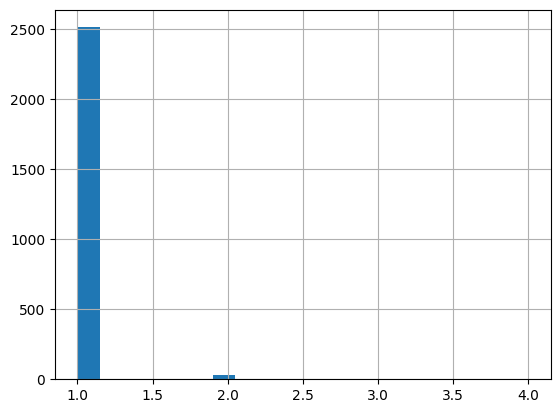

In [10]:
import matplotlib.pyplot as plt

df['tx_count'].hist(bins=20)
plt.show()


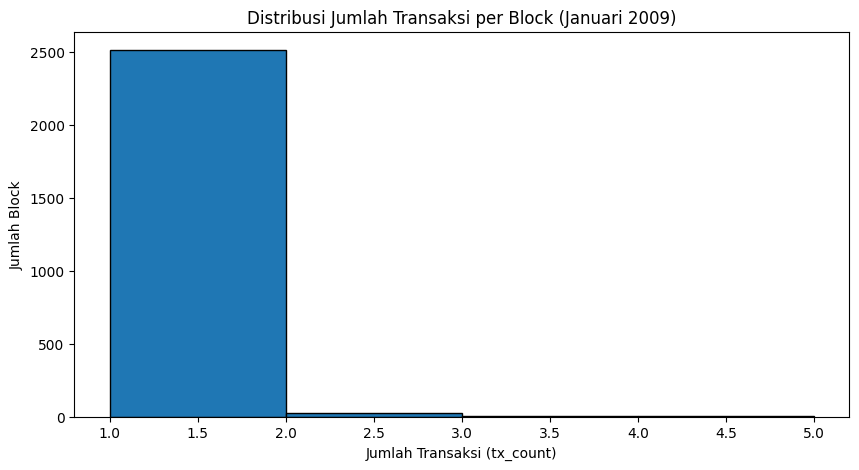

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['tx_count'], bins=range(1, df['tx_count'].max()+2), edgecolor='black')
plt.title("Distribusi Jumlah Transaksi per Block (Januari 2009)")
plt.xlabel("Jumlah Transaksi (tx_count)")
plt.ylabel("Jumlah Block")
plt.show()


In [12]:
# Block dengan transaksi terbanyak
max_tx = df['tx_count'].max()
block_max_tx = df[df['tx_count'] == max_tx]

print(f"Jumlah transaksi terbanyak: {max_tx}")
print(block_max_tx)


Jumlah transaksi terbanyak: 4
                     height  \
time                          
2009-01-15 06:08:20     546   

                                                                  hash  \
time                                                                     
2009-01-15 06:08:20  000000005a4ded781e667e06ceefafb71410b511fe0d5a...   

                     tx_count  
time                           
2009-01-15 06:08:20         4  


In [14]:
print(df.columns)


Index(['height', 'hash', 'tx_count'], dtype='object')


In [17]:
print(df[df['tx_count'] <= 1])


                     height  \
time                          
2009-01-03 18:15:05       0   
2009-01-09 02:54:25       1   
2009-01-09 02:55:44       2   
2009-01-09 03:02:53       3   
2009-01-09 03:16:28       4   
...                     ...   
2009-01-31 23:21:08    2539   
2009-01-31 23:32:35    2540   
2009-01-31 23:42:36    2541   
2009-01-31 23:45:40    2542   
2009-01-31 23:59:35    2543   

                                                                  hash  \
time                                                                     
2009-01-03 18:15:05  000000000019d6689c085ae165831e934ff763ae46a2a6...   
2009-01-09 02:54:25  00000000839a8e6886ab5951d76f411475428afc90947e...   
2009-01-09 02:55:44  000000006a625f06636b8bb6ac7b960a8d03705d1ace08...   
2009-01-09 03:02:53  0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...   
2009-01-09 03:16:28  000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...   
...                                                                ...   
2009

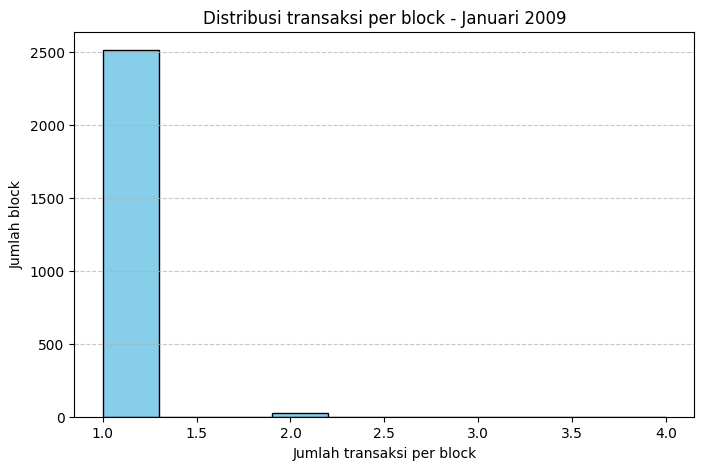

In [18]:
import matplotlib.pyplot as plt

# Histogram jumlah transaksi per block
plt.figure(figsize=(8,5))
plt.hist(df['tx_count'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Jumlah transaksi per block')
plt.ylabel('Jumlah block')
plt.title('Distribusi transaksi per block - Januari 2009')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
# Filter block dengan 0 atau 1 transaksi
coinbase_blocks = df[df['tx_count'] <= 1]

print(f"Jumlah block dengan 0 atau 1 transaksi: {len(coinbase_blocks)}")
print(coinbase_blocks)


Jumlah block dengan 0 atau 1 transaksi: 2515
                     height  \
time                          
2009-01-03 18:15:05       0   
2009-01-09 02:54:25       1   
2009-01-09 02:55:44       2   
2009-01-09 03:02:53       3   
2009-01-09 03:16:28       4   
...                     ...   
2009-01-31 23:21:08    2539   
2009-01-31 23:32:35    2540   
2009-01-31 23:42:36    2541   
2009-01-31 23:45:40    2542   
2009-01-31 23:59:35    2543   

                                                                  hash  \
time                                                                     
2009-01-03 18:15:05  000000000019d6689c085ae165831e934ff763ae46a2a6...   
2009-01-09 02:54:25  00000000839a8e6886ab5951d76f411475428afc90947e...   
2009-01-09 02:55:44  000000006a625f06636b8bb6ac7b960a8d03705d1ace08...   
2009-01-09 03:02:53  0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...   
2009-01-09 03:16:28  000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...   
...                              

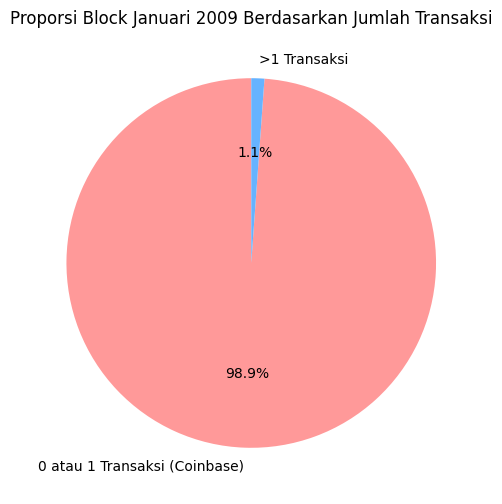

In [20]:
import matplotlib.pyplot as plt

# Hitung jumlah block
total_blocks = len(df)
coinbase_blocks_count = len(coinbase_blocks)
other_blocks_count = total_blocks - coinbase_blocks_count

# Data untuk pie chart
labels = ['0 atau 1 Transaksi (Coinbase)', '>1 Transaksi']
sizes = [coinbase_blocks_count, other_blocks_count]
colors = ['#ff9999','#66b3ff']

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporsi Block Januari 2009 Berdasarkan Jumlah Transaksi")
plt.show()


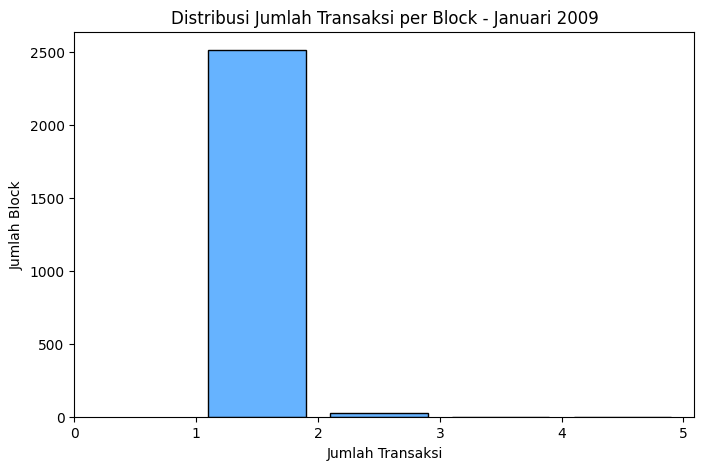

In [21]:
import matplotlib.pyplot as plt

# Ambil kolom jumlah transaksi
tx_counts = df['tx_count']

# Histogram
plt.figure(figsize=(8,5))
plt.hist(tx_counts, bins=range(1, max(tx_counts)+2), color='#66b3ff', edgecolor='black', rwidth=0.8)
plt.title("Distribusi Jumlah Transaksi per Block - Januari 2009")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Jumlah Block")
plt.xticks(range(0, max(tx_counts)+2, 1))  # supaya tick per angka
plt.show()


In [22]:
# Cari jumlah transaksi maksimal
max_tx = df['tx_count'].max()

# Ambil block yang memiliki jumlah transaksi maksimal
block_max_tx = df[df['tx_count'] == max_tx]

print(f"Jumlah transaksi maksimal: {max_tx}")
print("Detail block dengan transaksi terbanyak:")
print(block_max_tx)


Jumlah transaksi maksimal: 4
Detail block dengan transaksi terbanyak:
                     height  \
time                          
2009-01-15 06:08:20     546   

                                                                  hash  \
time                                                                     
2009-01-15 06:08:20  000000005a4ded781e667e06ceefafb71410b511fe0d5a...   

                     tx_count  
time                           
2009-01-15 06:08:20         4  


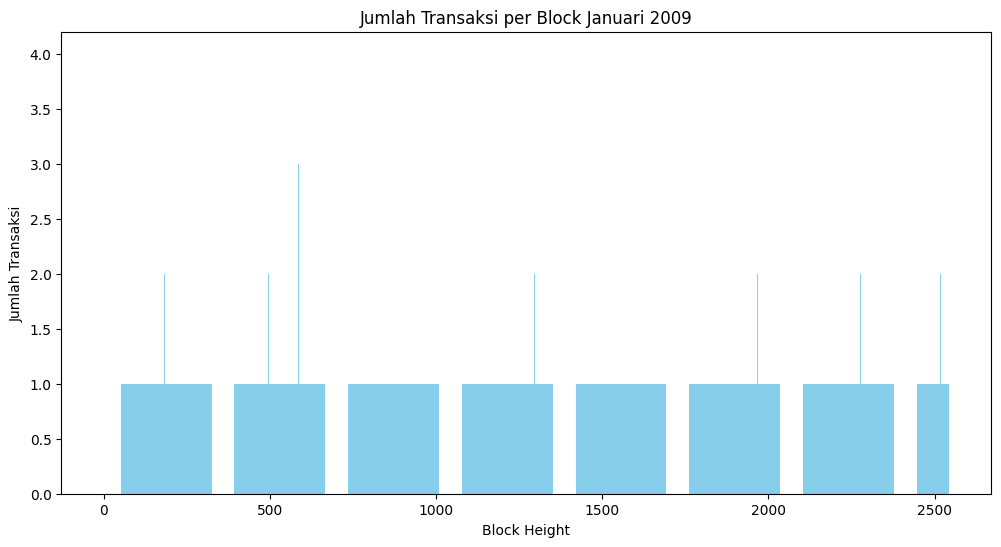

In [23]:
import matplotlib.pyplot as plt

# Plot jumlah transaksi per block
plt.figure(figsize=(12,6))
plt.bar(df['height'], df['tx_count'], color='skyblue')
plt.xlabel('Block Height')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Block Januari 2009')
plt.show()


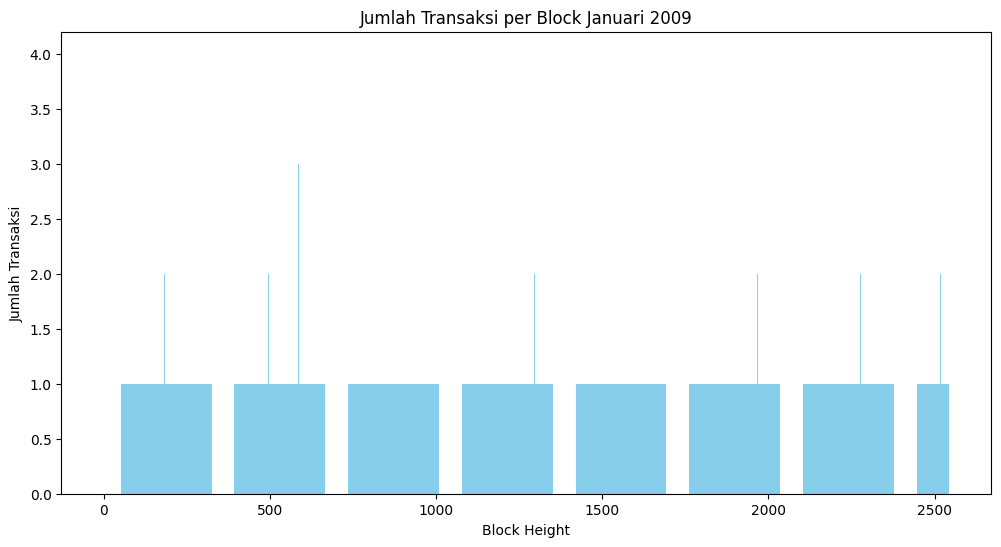

Block dengan transaksi terbanyak: Height 546, Tx Count 4


In [24]:
import matplotlib.pyplot as plt

# Cari jumlah transaksi maksimal
max_tx = df['tx_count'].max()
# Index block dengan transaksi maksimal
max_block = df[df['tx_count'] == max_tx]['height'].values[0]

plt.figure(figsize=(12,6))
colors = ['skyblue' if h != max_block else 'orange' for h in df['height']]
plt.bar(df['height'], df['tx_count'], color=colors)
plt.xlabel('Block Height')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Block Januari 2009')
plt.show()

print(f"Block dengan transaksi terbanyak: Height {max_block}, Tx Count {max_tx}")


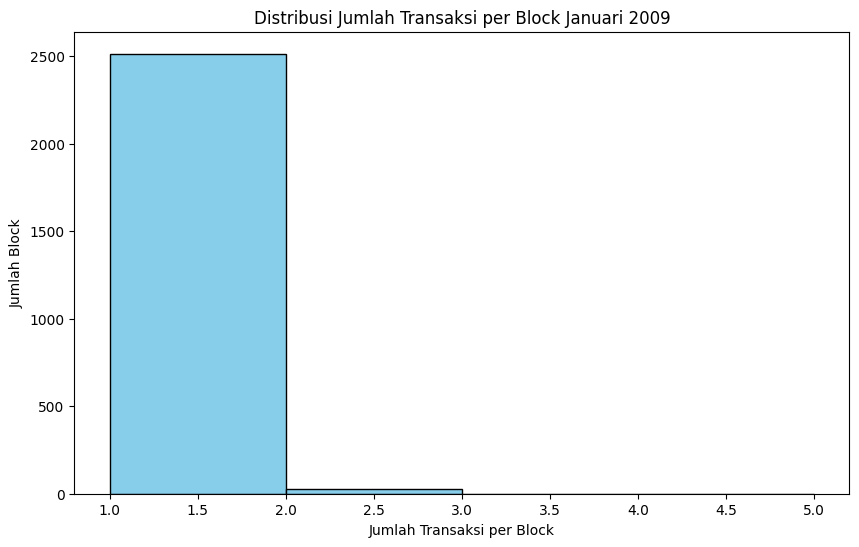

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['tx_count'], bins=range(1, df['tx_count'].max()+2), color='skyblue', edgecolor='black')
plt.xlabel('Jumlah Transaksi per Block')
plt.ylabel('Jumlah Block')
plt.title('Distribusi Jumlah Transaksi per Block Januari 2009')
plt.show()


c:\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


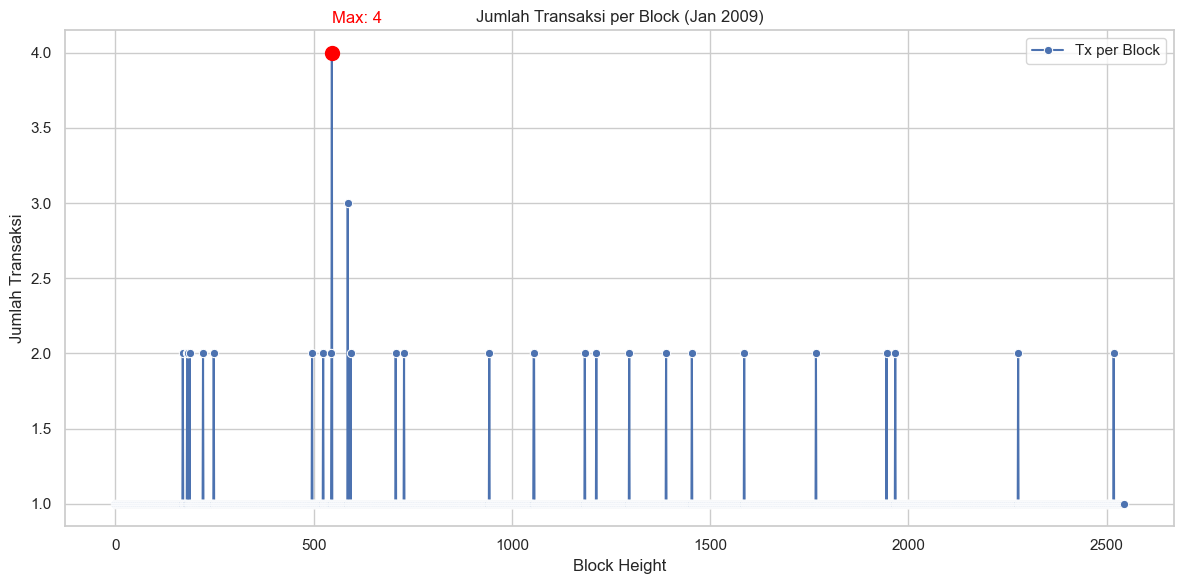

c:\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


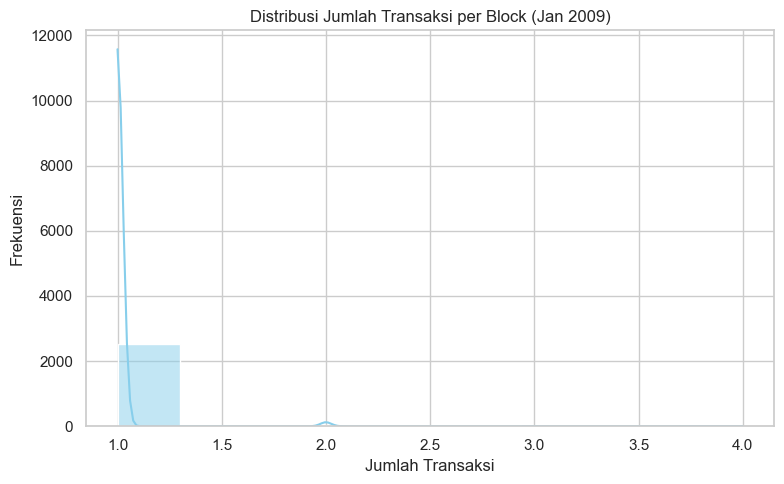

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca CSV
df = pd.read_csv("blocks_jan_2009.csv")

# Style Seaborn
sns.set(style="whitegrid")

# Cari block dengan transaksi tertinggi
max_tx = df['tx_count'].max()
max_block = df[df['tx_count'] == max_tx]

# --- Line chart ---
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="height", y="tx_count", marker="o", label="Tx per Block")

# Highlight block tertinggi
plt.scatter(max_block['height'], max_block['tx_count'], color='red', s=100, zorder=5)
for _, row in max_block.iterrows():
    plt.text(row['height'], row['tx_count']+0.2, f"Max: {row['tx_count']}", color='red')

plt.title("Jumlah Transaksi per Block (Jan 2009)")
plt.xlabel("Block Height")
plt.ylabel("Jumlah Transaksi")
plt.legend()
plt.tight_layout()
plt.savefig("tx_per_block.png")  # export ke PNG
plt.show()

# --- Histogram distribusi tx_count ---
plt.figure(figsize=(8,5))
sns.histplot(df['tx_count'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Transaksi per Block (Jan 2009)")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.savefig("tx_distribution.png")  # export ke PNG
plt.show()


In [28]:
import pandas as pd
import plotly.express as px

# Baca CSV
df = pd.read_csv("blocks_jan_2009.csv")

# Chart interaktif
fig = px.line(
    df, 
    x='height', 
    y='tx_count', 
    markers=True, 
    title='Jumlah Transaksi per Block (Jan 2009)',
    labels={'height':'Block Height', 'tx_count':'Jumlah Transaksi'}
)

# Highlight block tertinggi
max_tx = df['tx_count'].max()
max_block = df[df['tx_count'] == max_tx]
fig.add_scatter(
    x=max_block['height'], 
    y=max_block['tx_count'], 
    mode='markers+text',
    marker=dict(color='red', size=12),
    text=[f"Max: {row['tx_count']}" for _, row in max_block.iterrows()],
    textposition='top center',
    name='Block Tertinggi'
)

# Tampilkan chart interaktif
fig.show()


In [29]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Baca CSV
df = pd.read_csv("blocks_jan_2009.csv")

# Buat figure dengan 2 subplots: line chart dan histogram
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Jumlah Transaksi per Block", "Distribusi Jumlah Transaksi")
)

# Line chart
fig.add_trace(
    go.Scatter(
        x=df['height'], 
        y=df['tx_count'], 
        mode='lines+markers',
        name='Tx per Block'
    ),
    row=1, col=1
)

# Histogram
fig.add_trace(
    go.Histogram(
        x=df['tx_count'], 
        nbinsx=20,
        name='Distribusi Tx'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    height=700, 
    width=900,
    title_text="Analisis Transaksi Block Januari 2009",
    showlegend=True
)

# Tampilkan figure
fig.show()

# Summary statistics
summary = df['tx_count'].describe()
print("Summary Statistik Jumlah Transaksi per Block:")
print(summary)


Summary Statistik Jumlah Transaksi per Block:
count    2544.000000
mean        1.012579
std         0.124784
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: tx_count, dtype: float64


In [30]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Baca CSV
df = pd.read_csv("blocks_jan_2009.csv")

# Buat aplikasi Dash
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard Interaktif Transaksi Block Januari 2009"),
    
    html.Label("Pilih Range Block:"),
    dcc.RangeSlider(
        id='block-range',
        min=df['height'].min(),
        max=df['height'].max(),
        value=[df['height'].min(), df['height'].max()],
        marks={int(i): str(int(i)) for i in range(0, df['height'].max()+1, 10)},
        step=1
    ),
    
    dcc.Graph(id='line-chart'),
    dcc.Graph(id='histogram')
])

# Callback untuk update chart
@app.callback(
    [Output('line-chart', 'figure'),
     Output('histogram', 'figure')],
    [Input('block-range', 'value')]
)
def update_charts(block_range):
    filtered_df = df[(df['height'] >= block_range[0]) & (df['height'] <= block_range[1])]
    
    # Line chart
    line_fig = px.line(
        filtered_df, x='height', y='tx_count', 
        title='Jumlah Transaksi per Block',
        markers=True
    )
    
    # Histogram
    hist_fig = px.histogram(
        filtered_df, x='tx_count', nbins=20, 
        title='Distribusi Jumlah Transaksi'
    )
    
    return line_fig, hist_fig

if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'